In [1]:
import json

paths = {
  "3-Layer": "./results/overfit_model_3layer_mean.json",
  "ConvNext": "./results/overfit_model_convnext_min.json",
  "Inception": "./results/overfit_model_inception_conv.json",
  "MobileNetV2": "./results/overfit_model_mobilenet_conv_pretrained.json",
  "VGG": "./results/overfit_model_vgg_pretrained_conv.json",
  "ResNet50": "./results/overfit_model_resnet_mean.json"
}

In [2]:
losses = {}
for model in paths:
  with open(paths[model]) as f:
    data = json.load(f)
    losses[model] =[epoch["loss"] for epoch in data["validation"]]

/tmp/ipykernel_11608/2047994614.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(bottom=0)


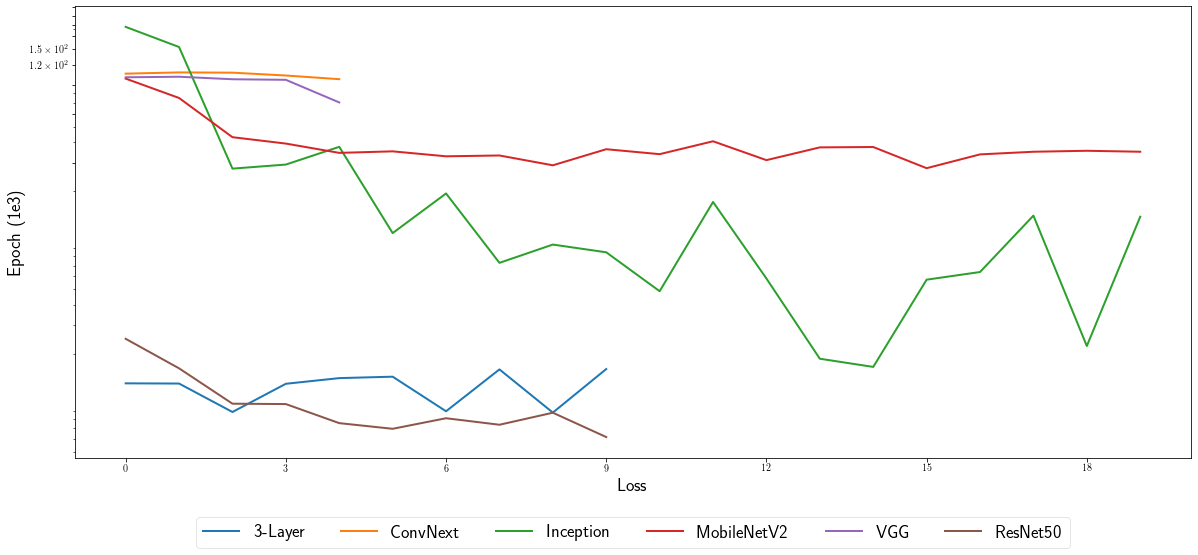

In [19]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(sns.color_palette())
#cmap = colors.ListedColormap(sns.color_palette("husl", 9))


# Bigger fonts (titles, axis, labels), bold, make leggend better

import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['text.usetex'] = True

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8.3))
ax.set_yscale('log')
# Be sure to only pick integer tick locations.
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))

for i, model in enumerate(losses.keys()):
  data = losses[model]
  plt.plot(data, color=cmap.colors[i], label=model, linewidth=2)

plt.ylim(bottom=0)

#plt.plot(xs / 1000, 0.9 * np.ones_like(xs), color=cmap.colors[4], linestyle="--", label="Optimal")
plt.xlabel("Loss", fontsize=18)
plt.ylabel("Epoch (1e3)", fontsize=18)

#handles, labels = plt.get_legend_handles_labels()
plt.legend(fancybox=True, framealpha=0.5, prop={"size": 18},
    loc="lower center", ncol=6,
    borderaxespad=0, bbox_to_anchor=(0.5, -0.2), shadow=False)
plt.savefig("boop.png", bbox_inches="tight")